<a href="https://colab.research.google.com/github/SaadSidd29/Deep-Learning-Projects/blob/main/Churn_modelling_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X=pd.concat([X,geography,gender],axis=1)

In [13]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [18]:
### Lets initialize the ANN
classifier=Sequential()

In [19]:
## Adding the input Layer and first hidden layer

classifier.add(Dense(10,input_shape=(11,),activation='relu'))
## First dense created will be of input layer with shape of 11 as input_shape=(11,)....10 is HL1
## kernal_initializer=Weight initialization techniques by default glorat uniform

#classifier.add(Dense(units=11,activation='relu'))

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [31]:
##adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [32]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [34]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
## Compile is not fitting, here we are just all inputs , after this we will do fit where training will happen

In [33]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [35]:
## Early Stopping
## Absolute zero will never reach, after say 100Epochs it is not converging to zero and its rotating around zero, then we should stop the operation
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,       ## 20   Epochs 
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [36]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4426 - accuracy: 0.8199 - val_loss: 0.3868 - val_accuracy: 0.8345
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3823 - accuracy: 0.8391 - val_loss: 0.3732 - val_accuracy: 0.8463
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3751 - accuracy: 0.8453 - val_loss: 0.3635 - val_accuracy: 0.8455
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3664 - accuracy: 0.8481 - val_loss: 0.3640 - val_accuracy: 0.8504
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3741 - accuracy: 0.8423 - val_loss: 0.3644 - val_accuracy: 0.8459
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3693 - accuracy: 0.8455 - val_loss: 0.3650 - val_accuracy: 0.8485
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3631 - accuracy: 0.8503 - val_loss: 0.3692 - val_accuracy:

In [37]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

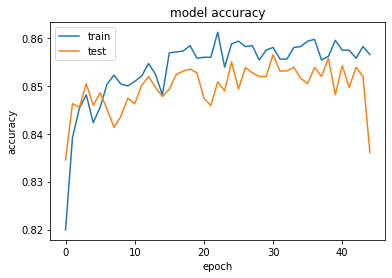

In [38]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

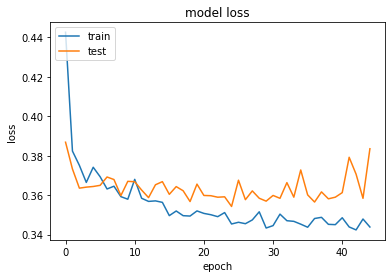

In [39]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [41]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1584,   11],
       [ 314,   91]])

In [42]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [43]:
score

0.8375

In [44]:
##get the weights
classifier.get_weights()

[array([[-0.27230084, -0.55482906, -0.17928772, -0.11183021, -0.10561196,
         -0.7150057 , -0.40121838,  0.4257337 , -0.40973127, -0.6162227 ],
        [ 0.41154906, -2.778104  ,  1.9578755 , -2.29758   ,  0.01391159,
         -0.6326714 ,  2.4084797 ,  0.5164833 ,  0.13987878, -2.1137326 ],
        [-1.0338646 ,  0.27463546, -0.2867309 , -0.57800573, -0.10152505,
          0.06891201,  0.13275564,  0.58960557,  0.44040883,  0.10992323],
        [ 1.8615232 , -0.71859545, -0.22611715,  1.6502507 ,  0.66095805,
          0.35136783, -0.4997943 , -0.33461577, -2.7255812 ,  2.4420614 ],
        [ 2.1063209 ,  0.30669585, -2.077186  ,  0.62152094,  3.2255175 ,
         -1.2385609 , -0.31734145, -1.0743217 , -2.5656374 , -0.6101337 ],
        [ 0.19868769, -0.05071641, -0.2902422 , -0.3731161 ,  0.14187218,
         -0.42271584, -0.02465223, -0.3865468 ,  0.08520605,  0.3089676 ],
        [-1.5689502 , -0.8409175 , -1.2177385 , -1.0532726 , -0.5107765 ,
         -0.28616577,  1.2278275

In [45]:
## save weights in a file
classifier.save('model.h5')

In [46]:
## Loading h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [47]:
classifier1.predict(X_test)

array([[0.21128926],
       [0.19058147],
       [0.06339553],
       ...,
       [0.17274421],
       [0.16063912],
       [0.1793807 ]], dtype=float32)

### **Doing for Regression**

In [49]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [57]:
## Regression

X=dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']]
y=dataset['EstimatedSalary']

In [58]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,0
9997,709,France,Female,36,7,0.00,1,0,1,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,1


In [59]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [60]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [61]:
## Concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1) 

In [62]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,0,0,0,1
9996,516,35,10,57369.61,1,1,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,1,0,0,0
9998,772,42,3,75075.31,2,1,0,1,1,0,1


In [63]:
#Splitting the dataset into Training set and Test Set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [65]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [66]:
### Lets initialize the ANN

regressor=Sequential()

In [67]:
## Adding the input Layer and first hidden layer

regressor.add(Dense(10,input_shape=(11,),activation='relu'))

In [68]:
# Adding the first hidden layer

regressor.add(Dense(units=10,activation='relu'))
regressor.add(Dropout(0.2))

In [69]:
## Adding the second hidden layer

regressor.add(Dense(units=10,activation='relu'))
regressor.add(Dropout(0.3))

In [70]:
##  Adding the output layer

regressor.add(Dense(1,activation='linear'))

In [71]:
## Compiling everything

regressor.compile(optimizer=opt,loss='mean_squared_error',metrics=['accuracy'])

In [77]:
## We can do like this also for loss parameter during compile

mse=tensorflow.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tensorflow.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [78]:
regressor.compile(optimizer=opt,loss=mse,metrics=[metrics])

In [79]:
## Early Stopping Test 1

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20       ## 20   Epochs 
)

In [80]:
## Training Model

model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 2s 3ms/step - loss: -3428426773954560.0000 - accuracy: 0.0000e+00 - val_loss: -3481590416015360.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: -3527894458433536.0000 - accuracy: 0.0000e+00 - val_loss: -3577771108335616.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: -3619130569654272.0000 - accuracy: 0.0000e+00 - val_loss: -3675553018150912.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: -3717040254746624.0000 - accuracy: 0.0000e+00 - val_loss: -3774932387364864.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: -3802277907267584.0000 - accuracy: 0.0000e+00 - val_loss: -3876107858214912.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: -392966448

In [81]:
## Prediction

y_pred=regressor.predict(X_test)

In [83]:
## Calculating R2

from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

-1232815871920.5898


**We got very poor accuracy. Will try again with different parameters**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Deep Learning Practice/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
X=df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']]

y=df['EstimatedSalary']

In [6]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
## Concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1) 

In [8]:
#Splitting the dataset into Training set and Test Set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,1,0,0,0


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [12]:
### Lets initialize the ANN
regressor=Sequential()

## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))

# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1))

In [13]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [34]:
## Loss function

import tensorflow
metrics=tensorflow.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [35]:
## Optimizer

import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [36]:
regressor.compile(optimizer=opt,loss='mse',metrics=[metrics])

In [37]:
## Early Stopping

import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_squared_error",
    patience=20
)

In [38]:
## Training

model_history=regressor.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 5s 3ms/step - loss: 5409320448.0000 - mean_squared_error: 5409320448.0000 - val_loss: 3391980800.0000 - val_mean_squared_error: 3391980800.0000
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 3364792320.0000 - mean_squared_error: 3364792320.0000 - val_loss: 3340367360.0000 - val_mean_squared_error: 3340367360.0000
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 3343673344.0000 - mean_squared_error: 3343673344.0000 - val_loss: 3344683264.0000 - val_mean_squared_error: 3344683264.0000
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 3338616320.0000 - mean_squared_error: 3338616320.0000 - val_loss: 3340147456.0000 - val_mean_squared_error: 3340147456.0000
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 3327638528.0000 - mean_squared_error: 3327638528.0000 - val_loss: 3330590464.0000 - val_mean_squared_error: 3330590464.0000
Epoch

In [40]:
## Predicted Values

y_pred=regressor.predict(X_test)

In [44]:
## Calculating Accuracy

from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

-0.01428264618147379
